In [3]:
# define rooms and items
#item in game room: couch, piano, key_a, and door_a
#item in Bedroom1 : queen bed, key to door b, door b 
couch = {
    "name": "couch",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
}

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

piano = {
    "name": "piano",
    "type": "furniture",
}

game_room = {
    "name": "game room",
    "type": "room",
}

outside = {
  "name": "outside"
}

bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

door_b = {
    "name": "door b",
    "type": "door",
}
key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}
door_c = {
    "name": "door c",
    "type": "door",
}
bedroom_2 = {
    "name": "bedroom 2",
    "type":"room",
}
key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

door_d = {
    "name": "door d",
    "type": "door",
}
key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}
dining_table = {
    "name": "dining table",
    "type": "furniture",
}

living_room = {
    "name": "living room",
    "type":"room",
}

corridor={
    "name": "corridor",
    "type": "room",
}

door_e = {
    "name": "door e",
    "type": "door",
}
door_f = {
    "name": "door f",
    "type": "door",
}

dominatrix_table = {
    "name": "dominatrix table",
    "type": "furniture",
}
the_pit = {
    "name": "the pit",
    "type": "room",
}

key_e = {
    "name": "key for door e",
    "type": "key",
    "target": door_e,
}
key_f = {
    "name": "key for door f",
    "type": "key",
    "target": door_f,
}
black_box = {
    "name": "black box",
    "type": "furniture"
}
blue_box = {
    "name": "blue box",
    "type": "furniture"
}


all_rooms = [game_room, outside, bedroom_1, bedroom_2, living_room]

all_doors = [door_a,door_b,door_c,door_d,door_e,door_f]

from playsound import playsound # sound import library
from IPython.display import Image


# define which items/rooms are related

object_relations = {
    
    "game room": [couch, piano, door_a],
    "piano": [key_a],
    "outside": [door_f],
    "door a": [game_room, bedroom_1],
    "bedroom 1": [queen_bed, door_a, door_b, door_c],
    "queen bed":[key_b],
    "door b":[bedroom_1,bedroom_2],
    "door c" :[bedroom_1,living_room],
    "bedroom 2": [double_bed, dresser, door_b],
    "double bed":[key_c],
    "dresser":[key_d],
    "door d":[living_room,corridor],
    "living room":[door_d, dining_table],
    "door e":[corridor,the_pit],
    "corridor":[door_f,door_e,black_box,blue_box],
    "door f":[outside,corridor],
    "black box":[key_e],
    "the pit":[door_e],
    "blue box":[key_f],
    
}

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside,
    "time_limit" : 30000
}

In [4]:
#import sounds 
import time #KB
rooms_visited = [] #KB created a list to store all rooms visitedx
starttime = time.time() #KB

def level():
    user_level = int(input("enter 1 for easy, 2 for medium, 3 for hard"))
    if user_level == 1:
        time_limit = 150
        
    elif user_level == 2:
        time_limit = 100
        
    else :
        time_limit = 50
    return time_limit


def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    
    
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!")
    playsound("welcome.mp3") #launch sound
    game_state["time_limit"]=level()
    print("Your time starts now! You have  " + str(game_state["time_limit"]) + " seconds to get out of the house!") #KB
    display(Image(filename='start.png'))
    play_room(game_state["current_room"])


def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room 

    if room in rooms_visited: #KB
        pass #KB
    else: #KB
        rooms_visited.append(room) #KB added current room to list
    # print(rooms_visited) # KB print command
    if(game_state["current_room"] == game_state["target_room"]):
        print("Congrats! You escaped the room!")
        display(Image(filename='test.png'))
    elif(game_state["current_room"] == the_pit):
        print("Congrats! You died!")
    else:
        print("You are now in "+ room["name"])
        time_now=time.time()
        print("Playing for " + str(int(time_now - starttime)) + " seconds" + " ONLY " +str(game_state["time_limit"] - (int(time_now - starttime))) + " SECONDS LEFT!!!") #KB
        
        if int(time_now - starttime) >= game_state["time_limit"]: #KB
            print("You have run out of time! Game over!")
        else :
            intended_action = input("What would you like to do? Type 'explore' or 'examine' or 'teleport'?").strip()
            if intended_action == "explore":
                if int(time_now - starttime) >= game_state["time_limit"]: #KB
                    print("You have run out of time! Game over!")
                else:
                    explore_room(room)
                    play_room(room)
            elif intended_action == "examine":
                if int(time_now - starttime) >= game_state["time_limit"]: #KB
                    print("You have run out of time! Game over!")
                else:
                    examine_item(input("What would you like to examine?").strip())
            elif intended_action == "teleport": #KB
                intended_room = (input(f"Which room would you like to teleport to? You can teleport to {[rooms['name'] for rooms in rooms_visited]}").strip()) #KB
                # print(intended_room) #KB
                for rooms in rooms_visited: #KB
                    if intended_room in rooms["name"]: #KB
                        room = rooms #KB
                # print(room) #KB
                playsound("teleport.mp3")
                play_room(room) #KB
                
            else:
                print("Not sure what you mean. Type 'explore' or 'examine'or 'teleport'.")
                play_room(room)
            linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

# def teleport(room):
#     """if user has already been to a room, he can go back there directly """
#     print(f"The rooms you have been to are: {}")



def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
           
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")
    
    if(next_room and input("Do you want to go to the next room? Ener 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)



You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!


enter 1 for easy, 2 for medium, 3 for hard 1


Your time starts now! You have  150 seconds to get out of the house!


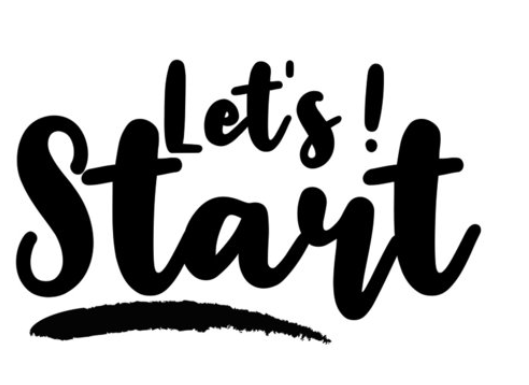

You are now in game room
Playing for 9 seconds ONLY 141 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? explore


You explore the room. This is game room. You find couch, piano, door a
You are now in game room
Playing for 21 seconds ONLY 129 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? piano


You examine piano. You find key for door a.
You are now in game room
Playing for 32 seconds ONLY 118 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door a


You examine door a. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes 


You are now in bedroom 1
Playing for 47 seconds ONLY 103 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? explore


You explore the room. This is bedroom 1. You find queen bed, door a, door b, door c
You are now in bedroom 1
Playing for 49 seconds ONLY 101 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? queen bed


You examine queen bed. You find key for door b.
You are now in bedroom 1
Playing for 67 seconds ONLY 83 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door b


You examine door b. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes


You are now in bedroom 2
Playing for 78 seconds ONLY 72 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? double bed


You examine double bed. You find key for door c.
You are now in bedroom 2
Playing for 84 seconds ONLY 66 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? dresser


You examine dresser. You find key for door d.
You are now in bedroom 2
Playing for 87 seconds ONLY 63 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? teleport
Which room would you like to teleport to? You can teleport to ['game room', 'bedroom 1', 'bedroom 2'] bedroom 1


You are now in bedroom 1
Playing for 98 seconds ONLY 52 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door c


You examine door c. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes


You are now in living room
Playing for 107 seconds ONLY 43 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? explore


You explore the room. This is living room. You find door d, dining table
You are now in living room
Playing for 109 seconds ONLY 41 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door


The item you requested is not found in the current room.
You are now in living room
Playing for 116 seconds ONLY 34 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? door d


Not sure what you mean. Type 'explore' or 'examine'or 'teleport'.
You are now in living room
Playing for 117 seconds ONLY 33 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door d


You examine door d. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes


You are now in corridor
Playing for 127 seconds ONLY 23 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? explore


You explore the room. This is corridor. You find door f, door e, black box, blue box
You are now in corridor
Playing for 130 seconds ONLY 20 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? black box


You examine black box. You find key for door e.
You are now in corridor
Playing for 137 seconds ONLY 13 SECONDS LEFT!!!


What would you like to do? Type 'explore' or 'examine' or 'teleport'? examine
What would you like to examine? door e


You examine door e. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes


Congrats! You died!





















































In [5]:
game_state = INIT_GAME_STATE.copy()

start_game()
